In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("yield_df.csv")

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head(3)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.rename(columns={"hg/ha_yield":"total_yield"}, inplace=True)


In [8]:
df.columns.tolist()

['Area',
 'Item',
 'Year',
 'total_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']

In [9]:
df["total_yield"] = df["total_yield"].astype("float64")
df["average_rain_fall_mm_per_year"] = df["average_rain_fall_mm_per_year"].astype("float64")

In [10]:
continous = ["total_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]

discrete_count = ["Year"]

discrete_categorical = ["Area", "Item"]

In [11]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
total_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [12]:
df[continous].describe()

,total_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,77053.332094,1149.05598,37076.909344,20.542627
std,84956.612897,709.81215,59958.784665,6.312051
min,50.000000,51.00000,0.040000,1.300000
25%,19919.250000,593.00000,1702.000000,16.702500
50%,38295.000000,1083.00000,17529.440000,21.510000
75%,104676.750000,1668.00000,48687.880000,26.000000
max,501412.000000,3240.00000,367778.000000,30.650000


In [13]:
df[continous].skew()

total_yield                      1.793229
average_rain_fall_mm_per_year    0.853832
pesticides_tonnes                3.490289
avg_temp                        -0.741582
dtype: float64

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

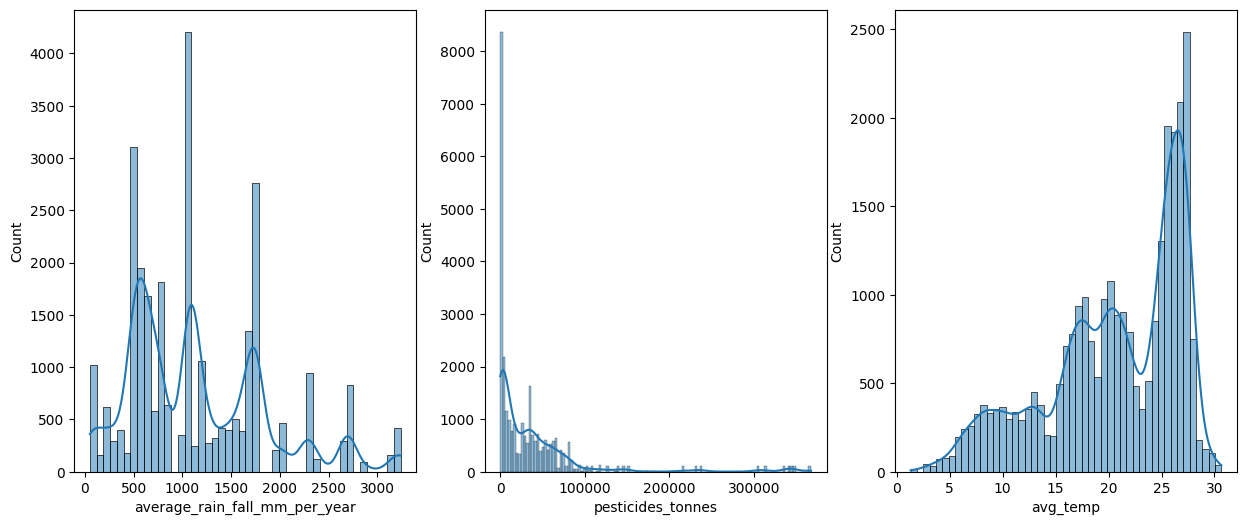

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.histplot(df["average_rain_fall_mm_per_year"], kde=True)

plt.subplot(1,3,2)
sns.histplot(df["pesticides_tonnes"], kde=True)

plt.subplot(1,3,3)
sns.histplot(df["avg_temp"], kde=True)

plt.show()

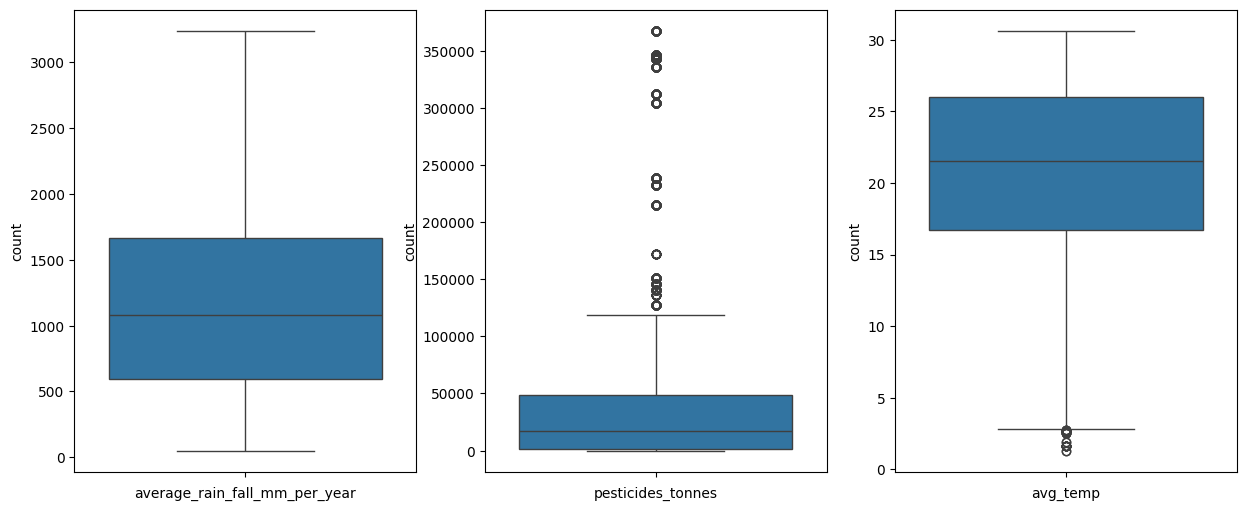

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.boxplot(df["average_rain_fall_mm_per_year"])
plt.xlabel("average_rain_fall_mm_per_year")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(df["pesticides_tonnes"])
plt.xlabel("pesticides_tonnes")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(df["avg_temp"])
plt.xlabel("avg_temp")
plt.ylabel("count")

plt.show()

In [18]:
df.duplicated().sum()

2310

Converting Right Skewed data into Normally Distributed data¶


In [19]:
# Boxcox Transformation

from scipy.stats import boxcox

boxcox(df["pesticides_tonnes"])

df["avg_boxcox"], param = boxcox(df["pesticides_tonnes"])
df["avg_boxcox"].skew()

-0.14159023174563254

In [20]:
df["pesticides_tonnes"] = df["avg_boxcox"]

In [21]:
df.drop(columns=["avg_boxcox"], inplace=True)

In [22]:
df.Area.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [23]:
df.Item.unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

df["Area"] = label_en.fit_transform(df["Area"])
df["Item"] = label_en.fit_transform(df["Item"])

In [25]:
X = df.drop('total_yield', axis=1)
y = df['total_yield']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
import numpy as np

In [29]:
# Initialize the model
rf_model = RandomForestRegressor()

In [30]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Predict on training data (optional for evaluation)
y_train_pred = rf_model.predict(X_train)

In [32]:
# Evaluate the model on training data (optional)
print(f"Training MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"Training R^2: {r2_score(y_train, y_train_pred)}")

Training MSE: 3825.1856587827797
Training R^2: 0.9979701097805633


In [34]:
import pickle

In [35]:
# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [36]:
# Load the saved Random Forest model using pickle
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

In [40]:
X_train.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
5493,18,5,2005,1604.0,13.811140,25.36
10969,42,6,1992,1083.0,39.720874,25.91
2001,8,0,1997,1292.0,11.935156,25.81
22157,73,3,1997,494.0,28.863213,23.76
311,2,7,2005,1010.0,5.384976,24.41


In [41]:
# Example new data (ensure it has the same structure as X_train)
# Create a new data sample in the same format as X_train
new_data = {
    'Area': [10],  # Example area
    'Item': [2],   # Example crop type
    'Year': [2000],  # Example year
    'average_rain_fall_mm_per_year': [1200],  # Example rainfall
    'pesticides_tonnes': [15],  # Example pesticide usage
    'avg_temp': [25.5],  # Example average temperature
    
}

In [42]:
# Convert the new data into a DataFrame (same as X_train structure)
import pandas as pd
new_data_df = pd.DataFrame(new_data)

In [43]:
# Predict using the loaded model
predicted_yield = loaded_rf_model.predict(new_data_df)

print(f"Predicted crop yield for new data: {predicted_yield[0]:.2f} units")

Predicted crop yield for new data: 64523.93 units
